<a href="https://colab.research.google.com/github/davan98/Davan_Assignment/blob/main/DAVANASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧾 TABLE OF CONTENTS**

1. [Import Libraries](#1-IMPORT-ALL-NECESSARY-LIBRARY)
2. [Download Dataset](#2-DOWNLOAD-THE-DATASET)
3. [View Dataset](#3-VIEW-THE-DATASET)
4. [Dataset Information](#4-GET-DATASET-INFORMATION)
5. [Data Cleaning](#5-DATA-CLEANING)
   - [Missing Values](#51-CHECK-FOR-MISSING-VALUES)
   - [Duplicate Values](#52-CHECK-FOR-DUPLICATE-VALUES)
   - [Outliers](#53-CHECK-FOR-OUTLIERS-AND-HANDLING-OF-THE-OUTLIERS)
       - [Pregnancies](#531-PREGNANCIES-COLUMN)
       - [Glucose](#532-GLUCOSE-COLUMN)
       - [Blood Pressure](#533-BLOOD-PRESSURE)
       - [Skin Thickness](#534-SKIN-THICKNESS)
       - [Insulin](#535-INSULIN)
       - [BMI](#536-BMI)
       - [Diabetes Pedigree Function](#537-DIABETES-PEDIGREE-FUNCTION)
       - [Age](#538-AGE)
6. [EDA – Univariate](#6-DATA-ANALYSIS-EXPLORATORY-DATA-ANALYSIS---UNIVARIATIVE)
7. [EDA – Bivariate](#7-DATA-ANALYSIS-EXPLORATORY-DATA-ANALYSIS---BIVARIATIVE)
8. [EDA – Multivariate](#8-DATA-ANALYSIS-EXPLORATORY-DATA-ANALYSIS---MULTIVARIATIVE)
9. [Overall Summary](#-OVERALL-SUMMARY)


# **IMPORT ALL NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub

# **DOWNLOAD THE DATASET**


###*Description:*

*The dataset used for this project is the Pima Diabetes Dataset
It contains 768 observations and 9 columns, including both independent variables such as Glucose, BMI, and Age, and the target variable Outcome indicating whether the patient has diabetes (1) or not (0).*

###*Insights:*

*The dataset is moderate in size, making it suitable for exploratory data analysis and predictive modeling without requiring extensive computational resources. Its structure is simple, numeric, and well-organized, which facilitates statistical analysis and visualization.*

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-dataset


In [ ]:
dataset=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

# **VIEW THE DATASET**

### *Description:*

*A preliminary examination of the dataset allows a glimpse of the data entries. Each row represents a patient record, with values for pregnancies, glucose levels, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, age, and the outcome.*

### *Insights:*

*During this initial inspection, it was observed that some numerical columns such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI contain zero values. While the dataset shows no explicit missing values, these zeros are unrealistic and indicate unrecorded or missing measurements. Identifying these early helps in planning the data cleaning steps.*

In [ ]:
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# **GET DATASET INFORMATION**

### *Description:*

*Using .info() and .describe(), the dataset was assessed for data types, counts of non-null entries, and basic statistics. All columns are numeric, with seven integer-type columns and two floating-point columns.*

### *Insights:*

*The dataset does not have explicit NaN values, which simplifies preprocessing. However, the presence of zero values in several features highlights the need for careful imputation. Understanding the structure at this stage is crucial to identify which variables require transformation or cleaning before analysis.*

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# **DATA CLEANING**

## **CHECK FOR MISSING VALUES**

### *Description:*

*Columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI contain zero values, which are considered as missing for this analysis.*

### *Insights:*

*Treating zeros as missing ensures that subsequent analysis is not biased. Replacing these zeros with median or mean values helps maintain statistical integrity and allows the models to learn meaningful patterns.*

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **CHECK FOR DUPLICATE VALUES**

### *Description:*

*The dataset was examined for duplicates using .duplicated().*

### *Insights:*

*No duplicate records were found. This confirms that each patient record is unique and prevents artificial inflation of correlations or model training bias.*

In [ ]:
dataset.duplicated().sum()

np.int64(0)

## **CHECK FOR OUTLIERS AND HANDLING OF THE OUTLIERS**

### *Description:*

*Outliers were identified using boxplots and the IQR method for all numeric features. Outliers were carefully examined for each column to ensure that extreme but valid medical observations were retained while incorrect or impossible values were corrected.*

### *Insights:*

*Outlier detection is critical as extreme values in variables like Glucose, BMI, and Insulin can disproportionately affect statistical measures. Handling these ensures more reliable visualization and accurate predictive modeling.*

###### **PREGNANCIES COLUMN**

<Axes: ylabel='Pregnancies'>

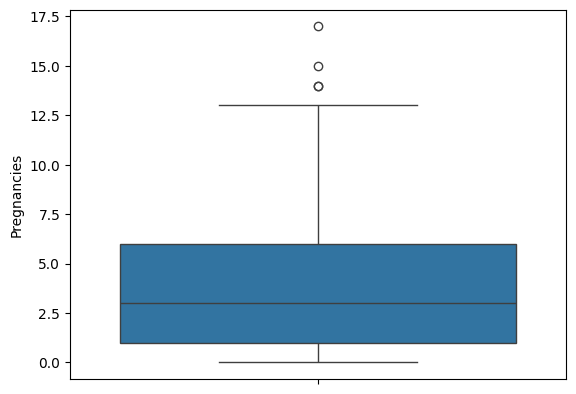

In [ ]:
sns.boxplot(dataset['Pregnancies'])

<Axes: ylabel='Pregnancies'>

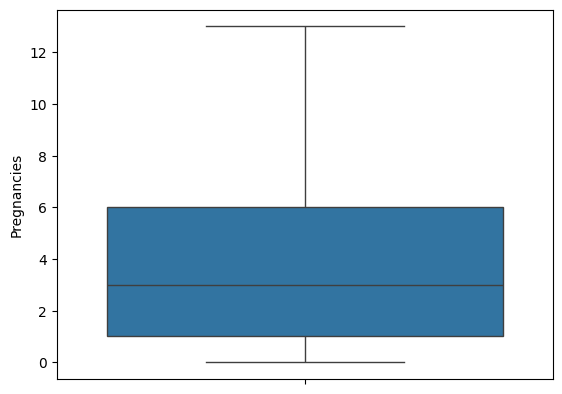

In [ ]:
Q1 = dataset['Pregnancies'].quantile(0.25)
Q3 = dataset['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['Pregnancies'] >= Q1 - 1.5*IQR) & (dataset['Pregnancies'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['Pregnancies'])

#### **GLUCOSE COLUMN**

<Axes: ylabel='Glucose'>

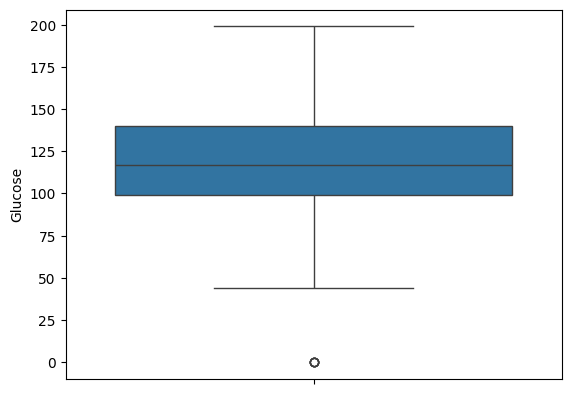

In [ ]:
sns.boxplot(dataset['Glucose'])

<Axes: ylabel='Glucose'>

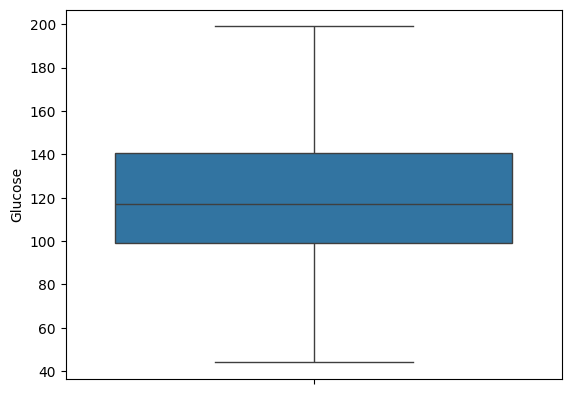

In [ ]:
Q1 = dataset['Glucose'].quantile(0.25)
Q3 = dataset['Glucose'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['Glucose'] >= Q1 - 1.5*IQR) & (dataset['Glucose'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['Glucose'])

#### **BLOOD PRESSURE**

<Axes: ylabel='BloodPressure'>

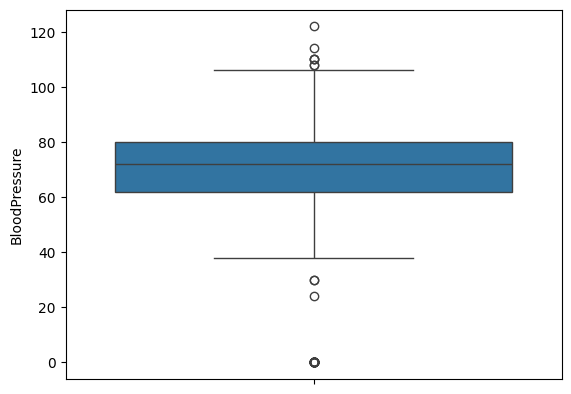

In [ ]:
sns.boxplot(dataset['BloodPressure'])

<Axes: ylabel='BloodPressure'>

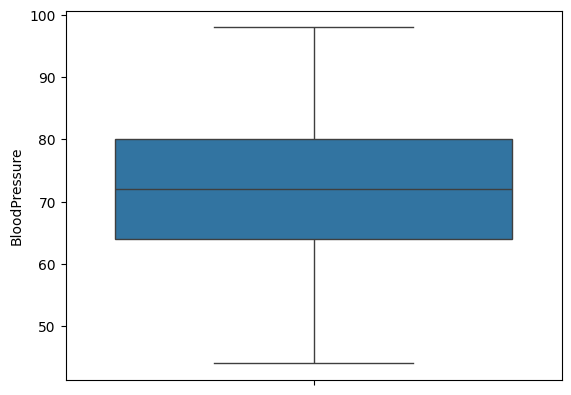

In [ ]:
Q1 = dataset['BloodPressure'].quantile(0.30)
Q3 = dataset['BloodPressure'].quantile(0.70)
IQR = Q3 - Q1
dataset = dataset[(dataset['BloodPressure'] >= Q1 - 1.5*IQR) & (dataset['BloodPressure'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['BloodPressure'])

#### **SKIN THICKNESS**

<Axes: ylabel='SkinThickness'>

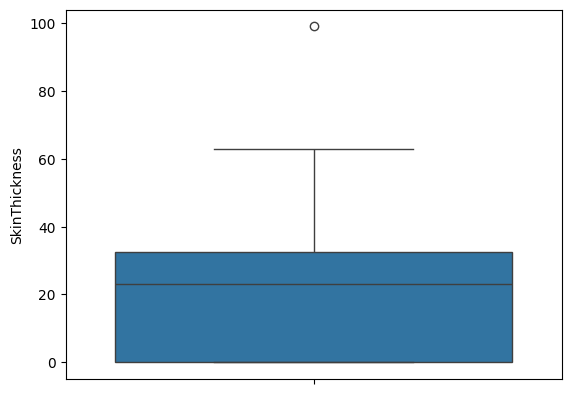

In [ ]:
sns.boxplot(dataset['SkinThickness'])

<Axes: ylabel='SkinThickness'>

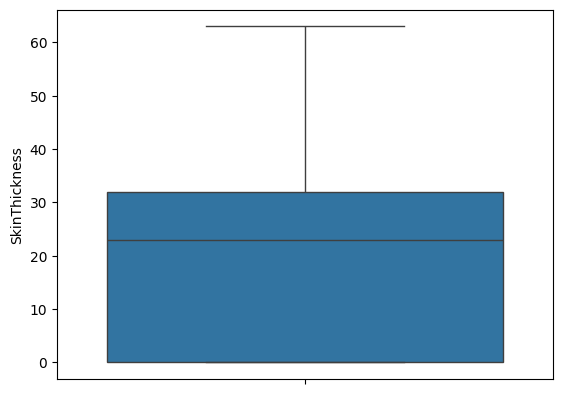

In [ ]:
Q1 = dataset['SkinThickness'].quantile(0.25)
Q3 = dataset['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['SkinThickness'] >= Q1 - 1.5*IQR) & (dataset['SkinThickness'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['SkinThickness'])

#### **INSULIN**

<Axes: ylabel='Insulin'>

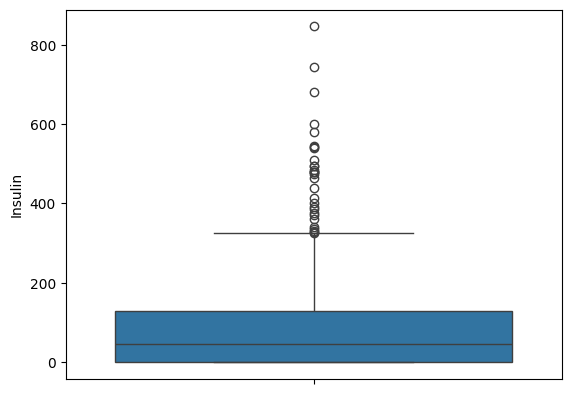

In [ ]:
sns.boxplot(dataset['Insulin'])

<Axes: ylabel='Insulin'>

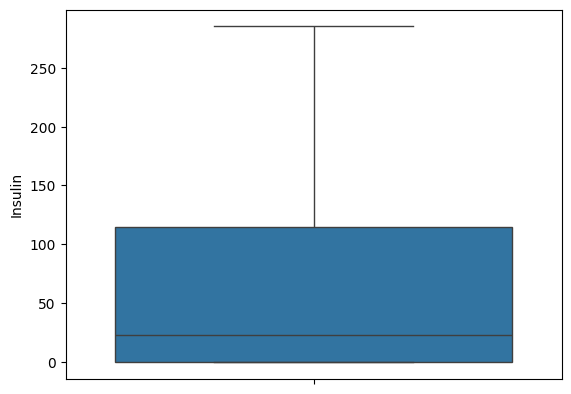

In [ ]:
Q1 = dataset['Insulin'].quantile(0.30)
Q3 = dataset['Insulin'].quantile(0.70)
IQR = Q3 - Q1
dataset = dataset[(dataset['Insulin'] >= Q1 - 1.5*IQR) & (dataset['Insulin'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['Insulin'])

#### **BMI**

<Axes: ylabel='BMI'>

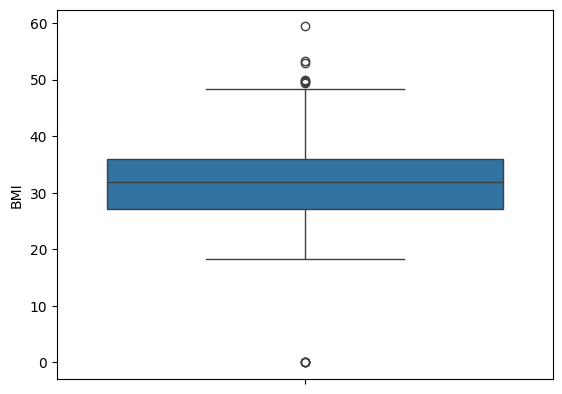

In [ ]:
sns.boxplot(dataset['BMI'])

<Axes: ylabel='BMI'>

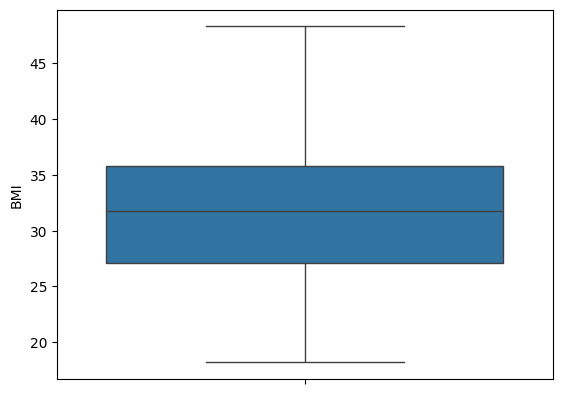

In [ ]:
Q1 = dataset['BMI'].quantile(0.25)
Q3 = dataset['BMI'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['BMI'] >= Q1 - 1.5*IQR) & (dataset['BMI'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['BMI'])

#### **DIABETES PEDIGREE FUNCTION**

<Axes: ylabel='DiabetesPedigreeFunction'>

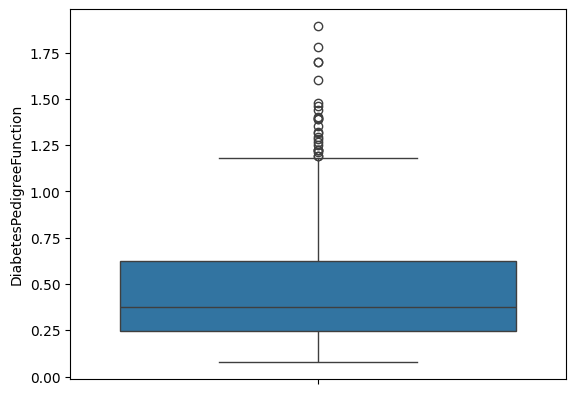

In [ ]:
sns.boxplot(dataset['DiabetesPedigreeFunction'])

<Axes: ylabel='DiabetesPedigreeFunction'>

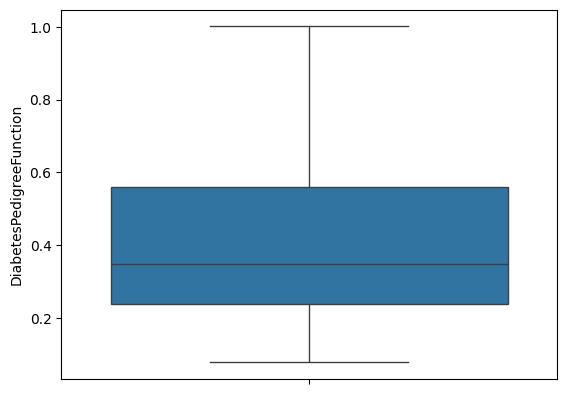

In [ ]:
Q1 = dataset['DiabetesPedigreeFunction'].quantile(0.30)
Q3 = dataset['DiabetesPedigreeFunction'].quantile(0.70)
IQR = Q3 - Q1
dataset = dataset[(dataset['DiabetesPedigreeFunction'] >= Q1 - 1.5*IQR) & (dataset['DiabetesPedigreeFunction'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['DiabetesPedigreeFunction'])

#### **AGE**

<Axes: ylabel='Age'>

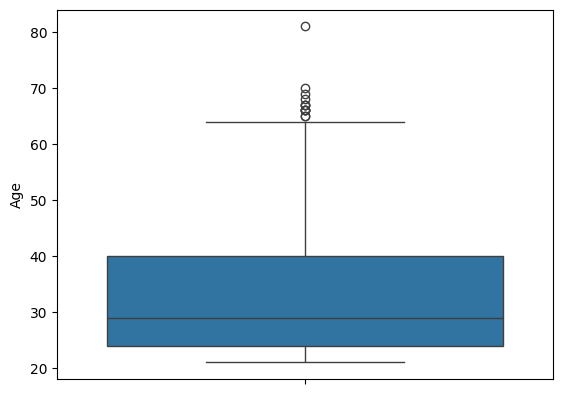

In [ ]:
sns.boxplot(dataset['Age'])

<Axes: ylabel='Age'>

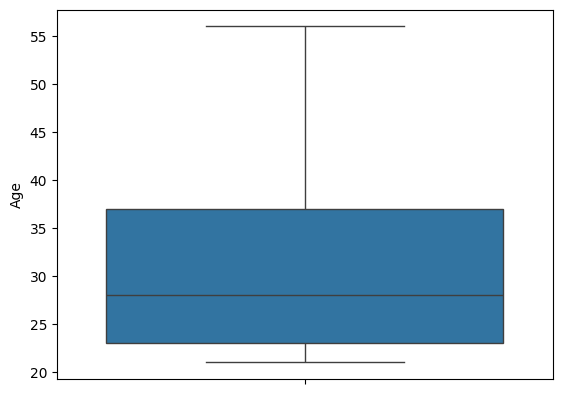

In [ ]:
Q1 = dataset['Age'].quantile(0.30)
Q3 = dataset['Age'].quantile(0.70)
IQR = Q3 - Q1
dataset = dataset[(dataset['Age'] >= Q1 - 1.5*IQR) & (dataset['Age'] <= Q3 + 1.5*IQR)]
sns.boxplot(dataset['Age'])

## **DATA ANALYSIS (EXPLORATORY DATA ANALYSIS - UNIVARIATIVE)**

#### **PREGNANCIES**

### *Description:*

*The distribution shows most patients with 0–12 pregnancies.*

### *Insights:*

*Higher number of pregnancies slightly correlates with diabetes risk, but the relationship is weak and non-linear.*

<Axes: xlabel='Pregnancies', ylabel='Count'>

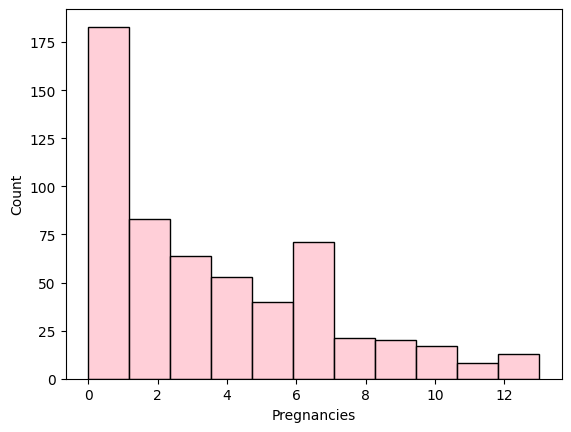

In [ ]:
sns.histplot(dataset['Pregnancies'], color='pink')

#### **Glucose**

### *Description:*

*Glucose levels range widely, with a right-skewed distribution.*

### *Insights:*

*Patients with higher glucose levels (>125 mg/dL) are predominantly diabetic, making Glucose one of the strongest predictors of Outcome.*

<Axes: xlabel='Glucose', ylabel='Count'>

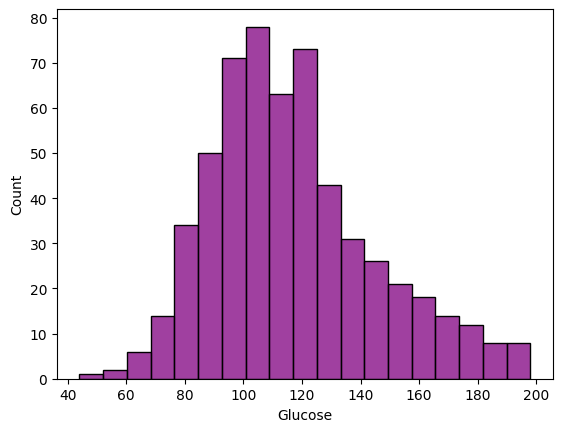

In [ ]:
sns.histplot(dataset['Glucose'], color='purple')

#### **BLOOD PRESSURE**

### *Description:*

*Diastolic blood pressure is mostly concentrated between 60–80 mm Hg.*

#### *Insights:*

*There is a slight increase in diabetes prevalence with higher BP, but correlation is weak.*

<Axes: xlabel='BloodPressure', ylabel='Count'>

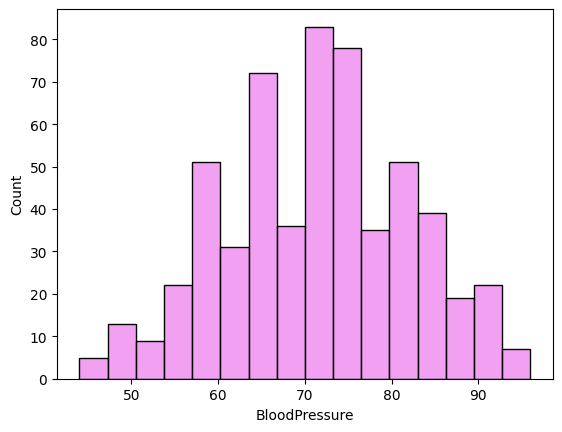

In [ ]:
sns.histplot(dataset['BloodPressure'], color='violet')

#### **SKIN THICKNESS**

### *Description:*

*Skin thickness values are mostly within 10–35 mm, with many zeros.*

### *Insights:*

*Due to missing values, SkinThickness shows weak correlation with Outcome.*

<Axes: xlabel='SkinThickness', ylabel='Count'>

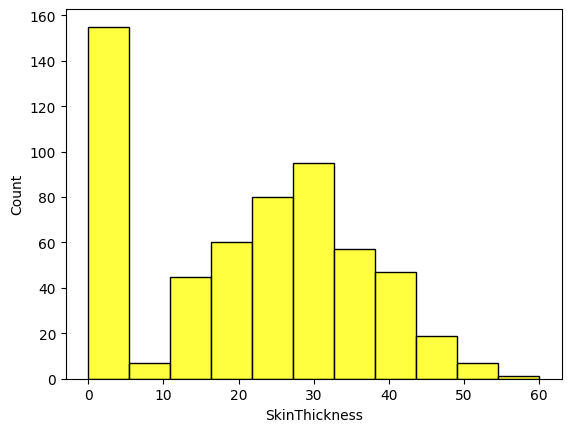

In [ ]:
sns.histplot(dataset['SkinThickness'], color='yellow')

#### **INSULIN**

### *Description:*

*Insulin levels vary widely, with many zeros.*

### *Insights:*

*Moderate correlation with diabetes exists, but missing data reduces reliability.*

<Axes: xlabel='Insulin', ylabel='Count'>

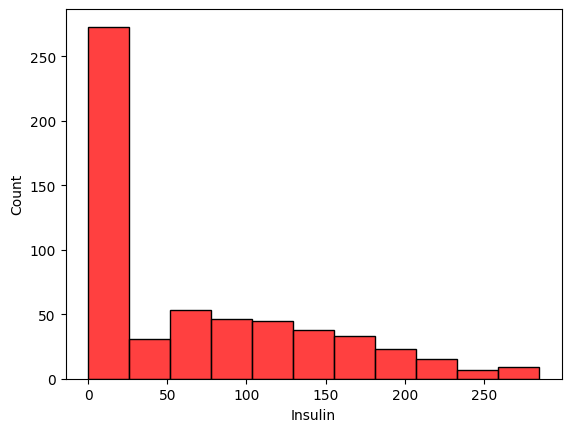

In [ ]:
sns.histplot(dataset['Insulin'], color='red')

#### **BMI**

### *Description:*

*BMI distribution is right-skewed.*

### *Insights:*

*Higher BMI strongly indicates diabetes risk.*

<Axes: xlabel='BMI', ylabel='Count'>

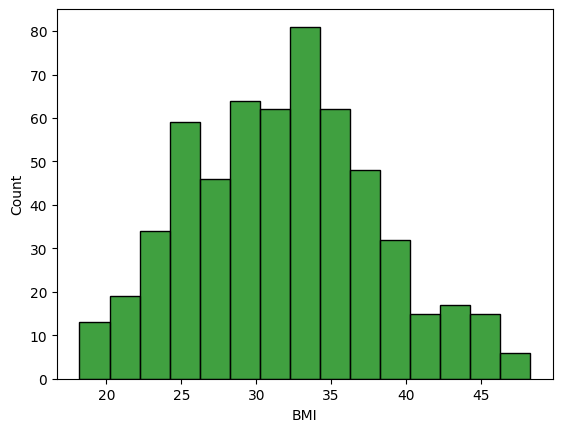

In [ ]:
sns.histplot(dataset['BMI'], color='green')

#### **DIABETES PEDIGREE FUNCTION**

### *Description:*

*Values range from 0.078 to 2.42.*

### *Insights:*

*Higher pedigree function values are linked to higher diabetes risk, reflecting genetic influence.*

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

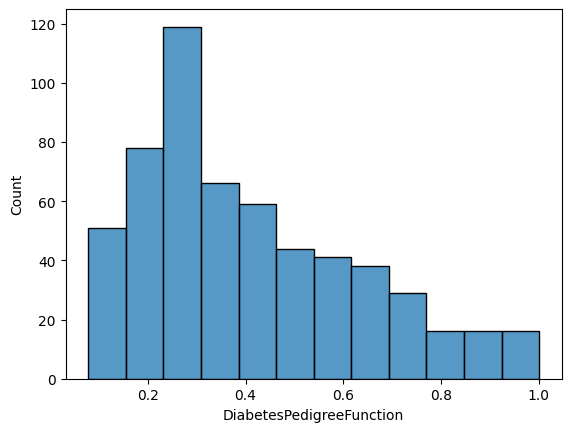

In [ ]:
sns.histplot(dataset['DiabetesPedigreeFunction'])

#### **AGE**

### *Description:*

*Patients are mostly aged 21–50, with few older than 70.*

### *Insights:*

*Older age slightly increases diabetes risk.*

<Axes: xlabel='Age', ylabel='Count'>

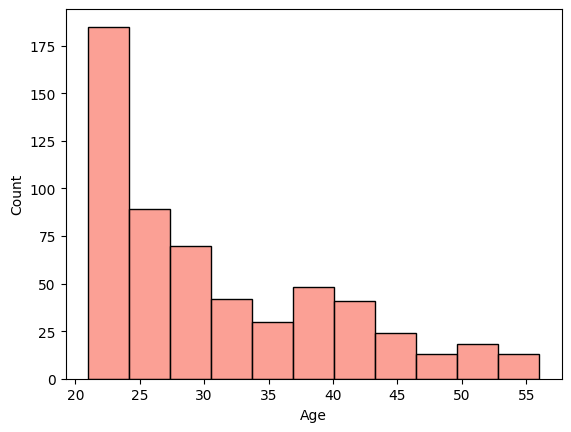

In [ ]:
sns.histplot(dataset['Age'], color='salmon')

## **DATA ANALYSIS (EXPLORATORY DATA ANALYSIS - BIVARIATIVE)**

#### **PREGNANCIES VS OUTCOME**

### *Description:*

*Analyzing pregnancies against diabetes outcome.*

### *Insights:*

*More pregnancies slightly increase diabetes likelihood.*

/tmp/ipython-input-3065014823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pregnancies', y='Outcome', data=dataset,palette='rainbow')


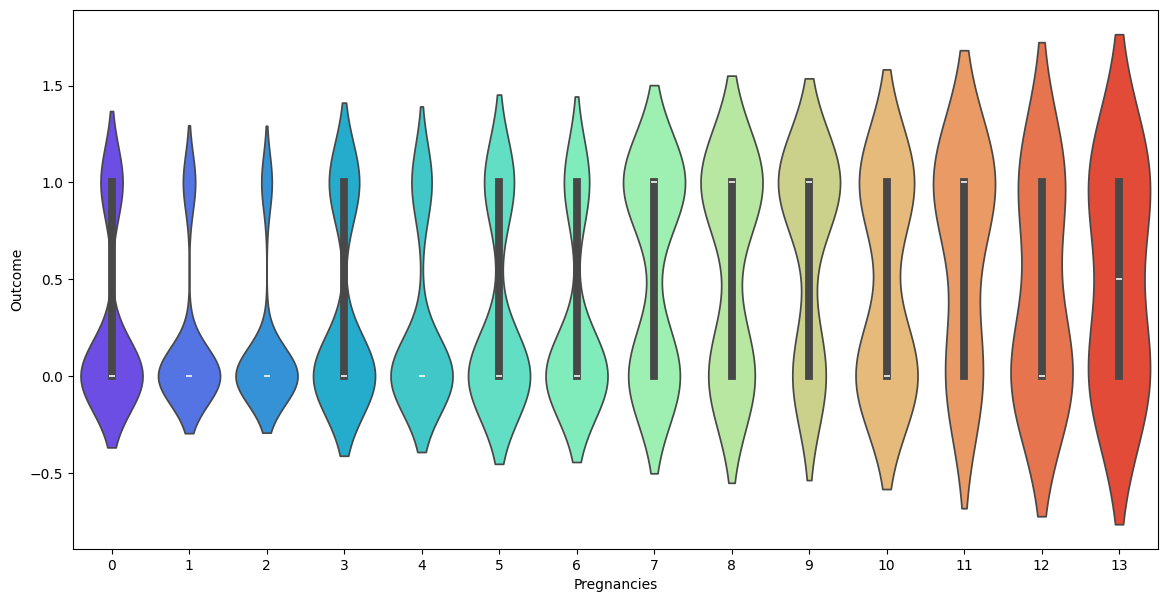

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Pregnancies', y='Outcome', data=dataset,palette='rainbow')
plt.show()

#### **GLUCOSE VS OUTCOME**

### *Description:*

*High glucose strongly correlates with diabetes.*

### *Insights:*

*Glucose is the most significant single predictor.*

/tmp/ipython-input-2841086902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Glucose', y='Outcome', data=dataset,palette='rainbow')


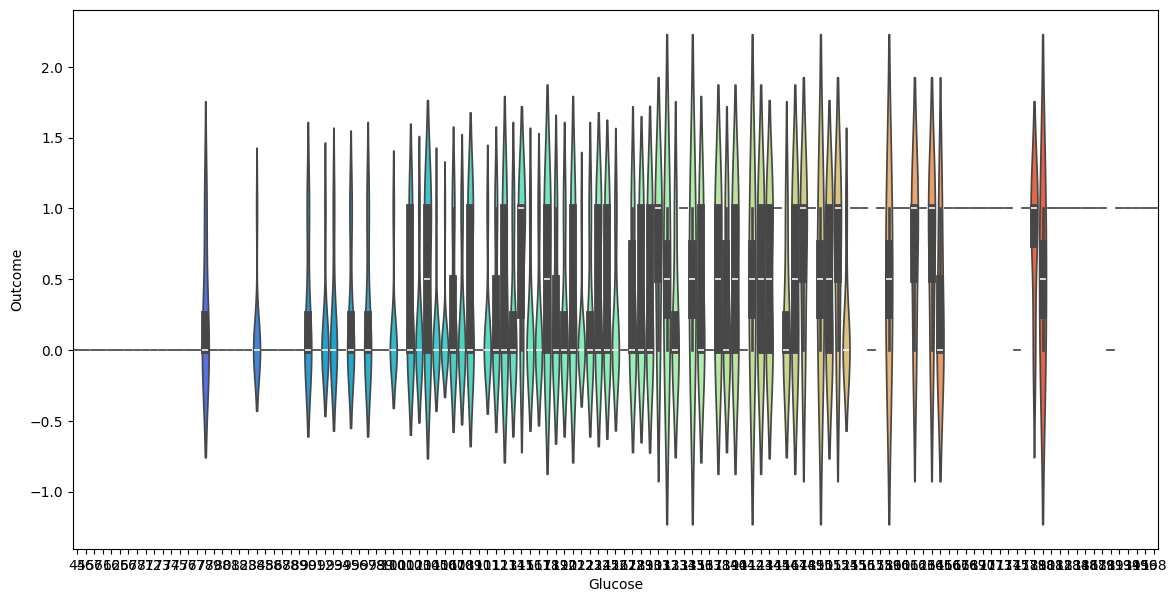

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Glucose', y='Outcome', data=dataset,palette='rainbow')
plt.show()

#### **BLOOD PRESSURE VS OUTCOME**

### *Description:*

*Diastolic BP shows slight positive correlation.*

### *Insights:*

*Not a strong predictor; trend is weak.*

/tmp/ipython-input-3788569067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BloodPressure', y='Outcome', data=dataset,palette='rainbow')


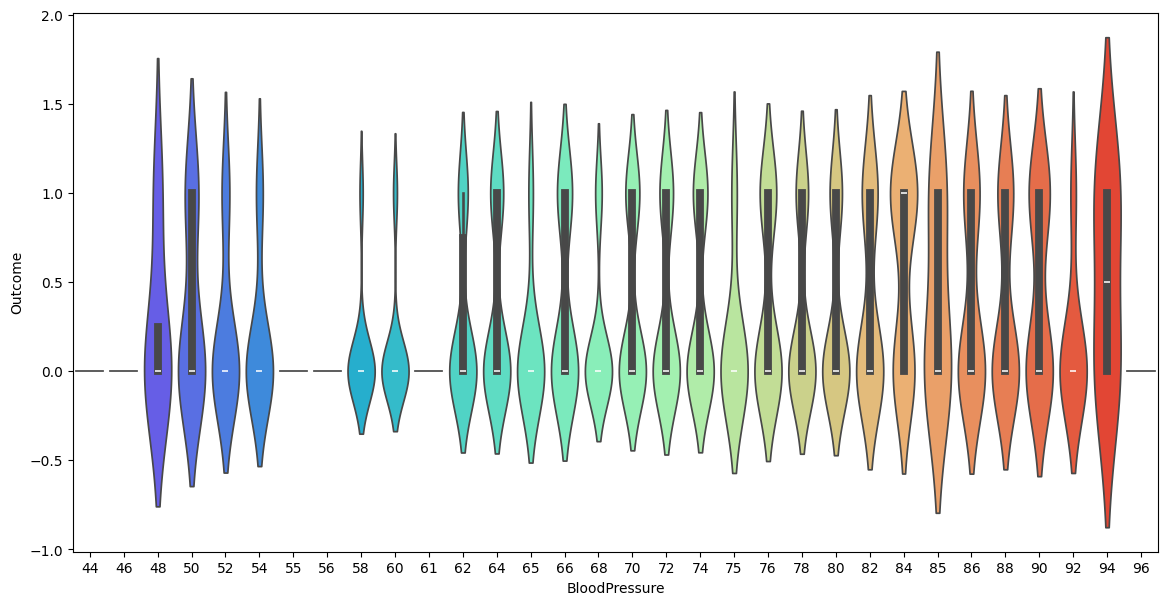

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='BloodPressure', y='Outcome', data=dataset,palette='rainbow')
plt.show()

#### **SKIN THICKNESS VS OUTCOME**

### *Description:*

*Analyzing triceps skinfold vs outcome.*

### *Insights:*

*Weak correlation; missing values reduce reliability.*

/tmp/ipython-input-522774142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SkinThickness', y='Outcome', data=dataset, palette='rainbow')


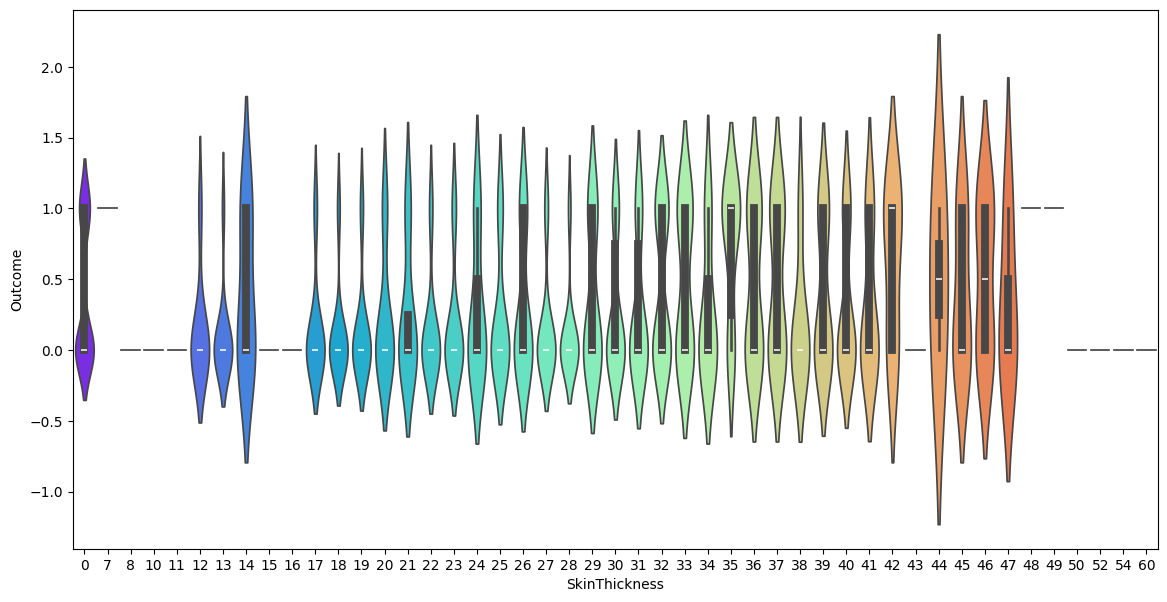

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='SkinThickness', y='Outcome', data=dataset, palette='rainbow')
plt.show()

#### **INSULIN VS OUTCOME**

### *Description:*

*Insulin levels vs outcome.*

### *Insights:*

*Moderate correlation; imputation may improve reliability.*

/tmp/ipython-input-995376594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Insulin', y='Outcome', data=dataset, palette='rainbow')


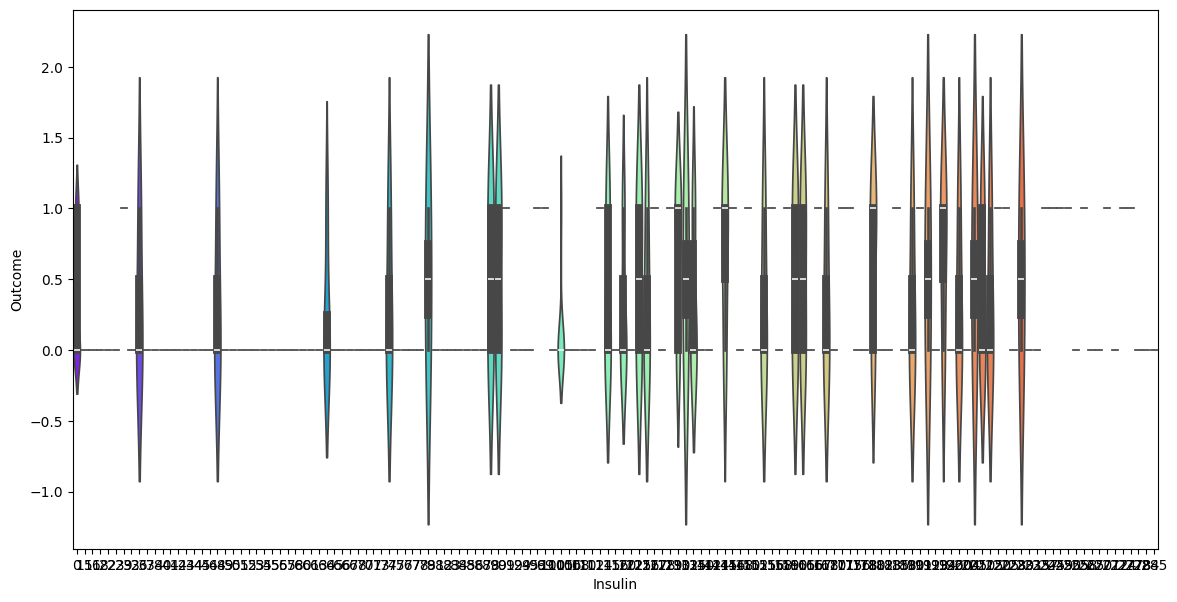

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Insulin', y='Outcome', data=dataset, palette='rainbow')
plt.show()

#### **AGE VS OUTCOME**

### *Description:*

*Age against diabetes outcome.*

### *Insights:*

*Older age increases risk slightly, correlation is moderate.*

/tmp/ipython-input-253626969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age', y='Outcome', data=dataset, palette='rainbow')


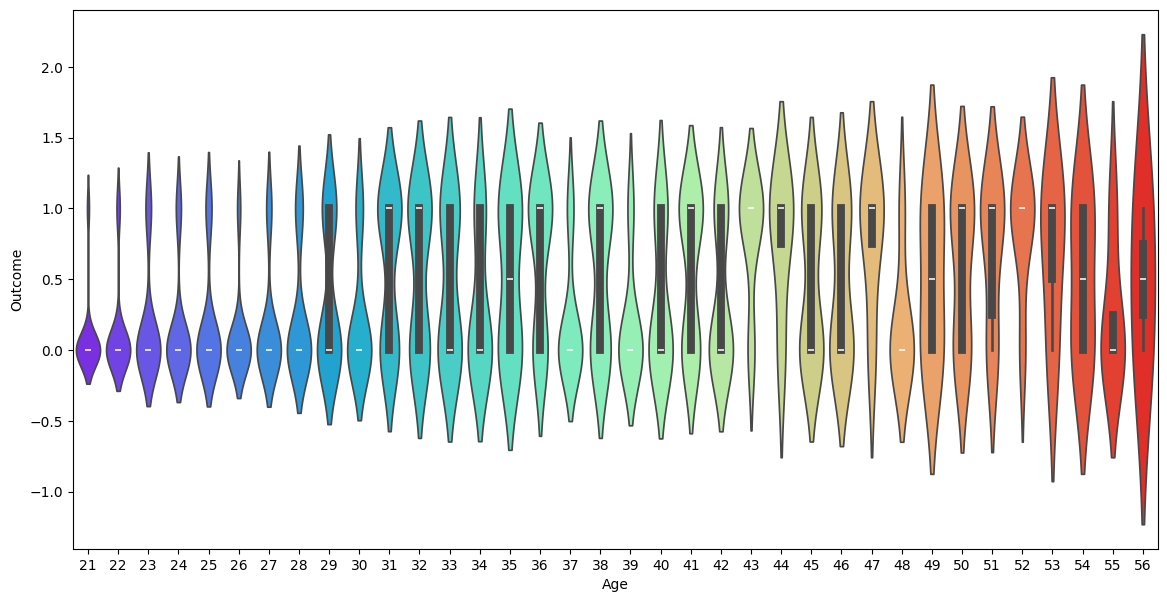

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Age', y='Outcome', data=dataset, palette='rainbow')
plt.show()

## **DATA ANALYSIS (EXPLORATORY DATA ANALYSIS - MULTIVARIATIVE ANALYSIS)**

### *Description:*

*Exploring relationships among multiple variables simultaneously using pairplots and correlation heatmaps.*

### *Insights:*

*Glucose, BMI, Age, and Pregnancies together are strongest indicators of diabetes.*

*High Glucose + High BMI + Older Age → highest probability of diabetes.*

*Insulin and SkinThickness contribute moderately; Blood Pressure weakly correlated.*

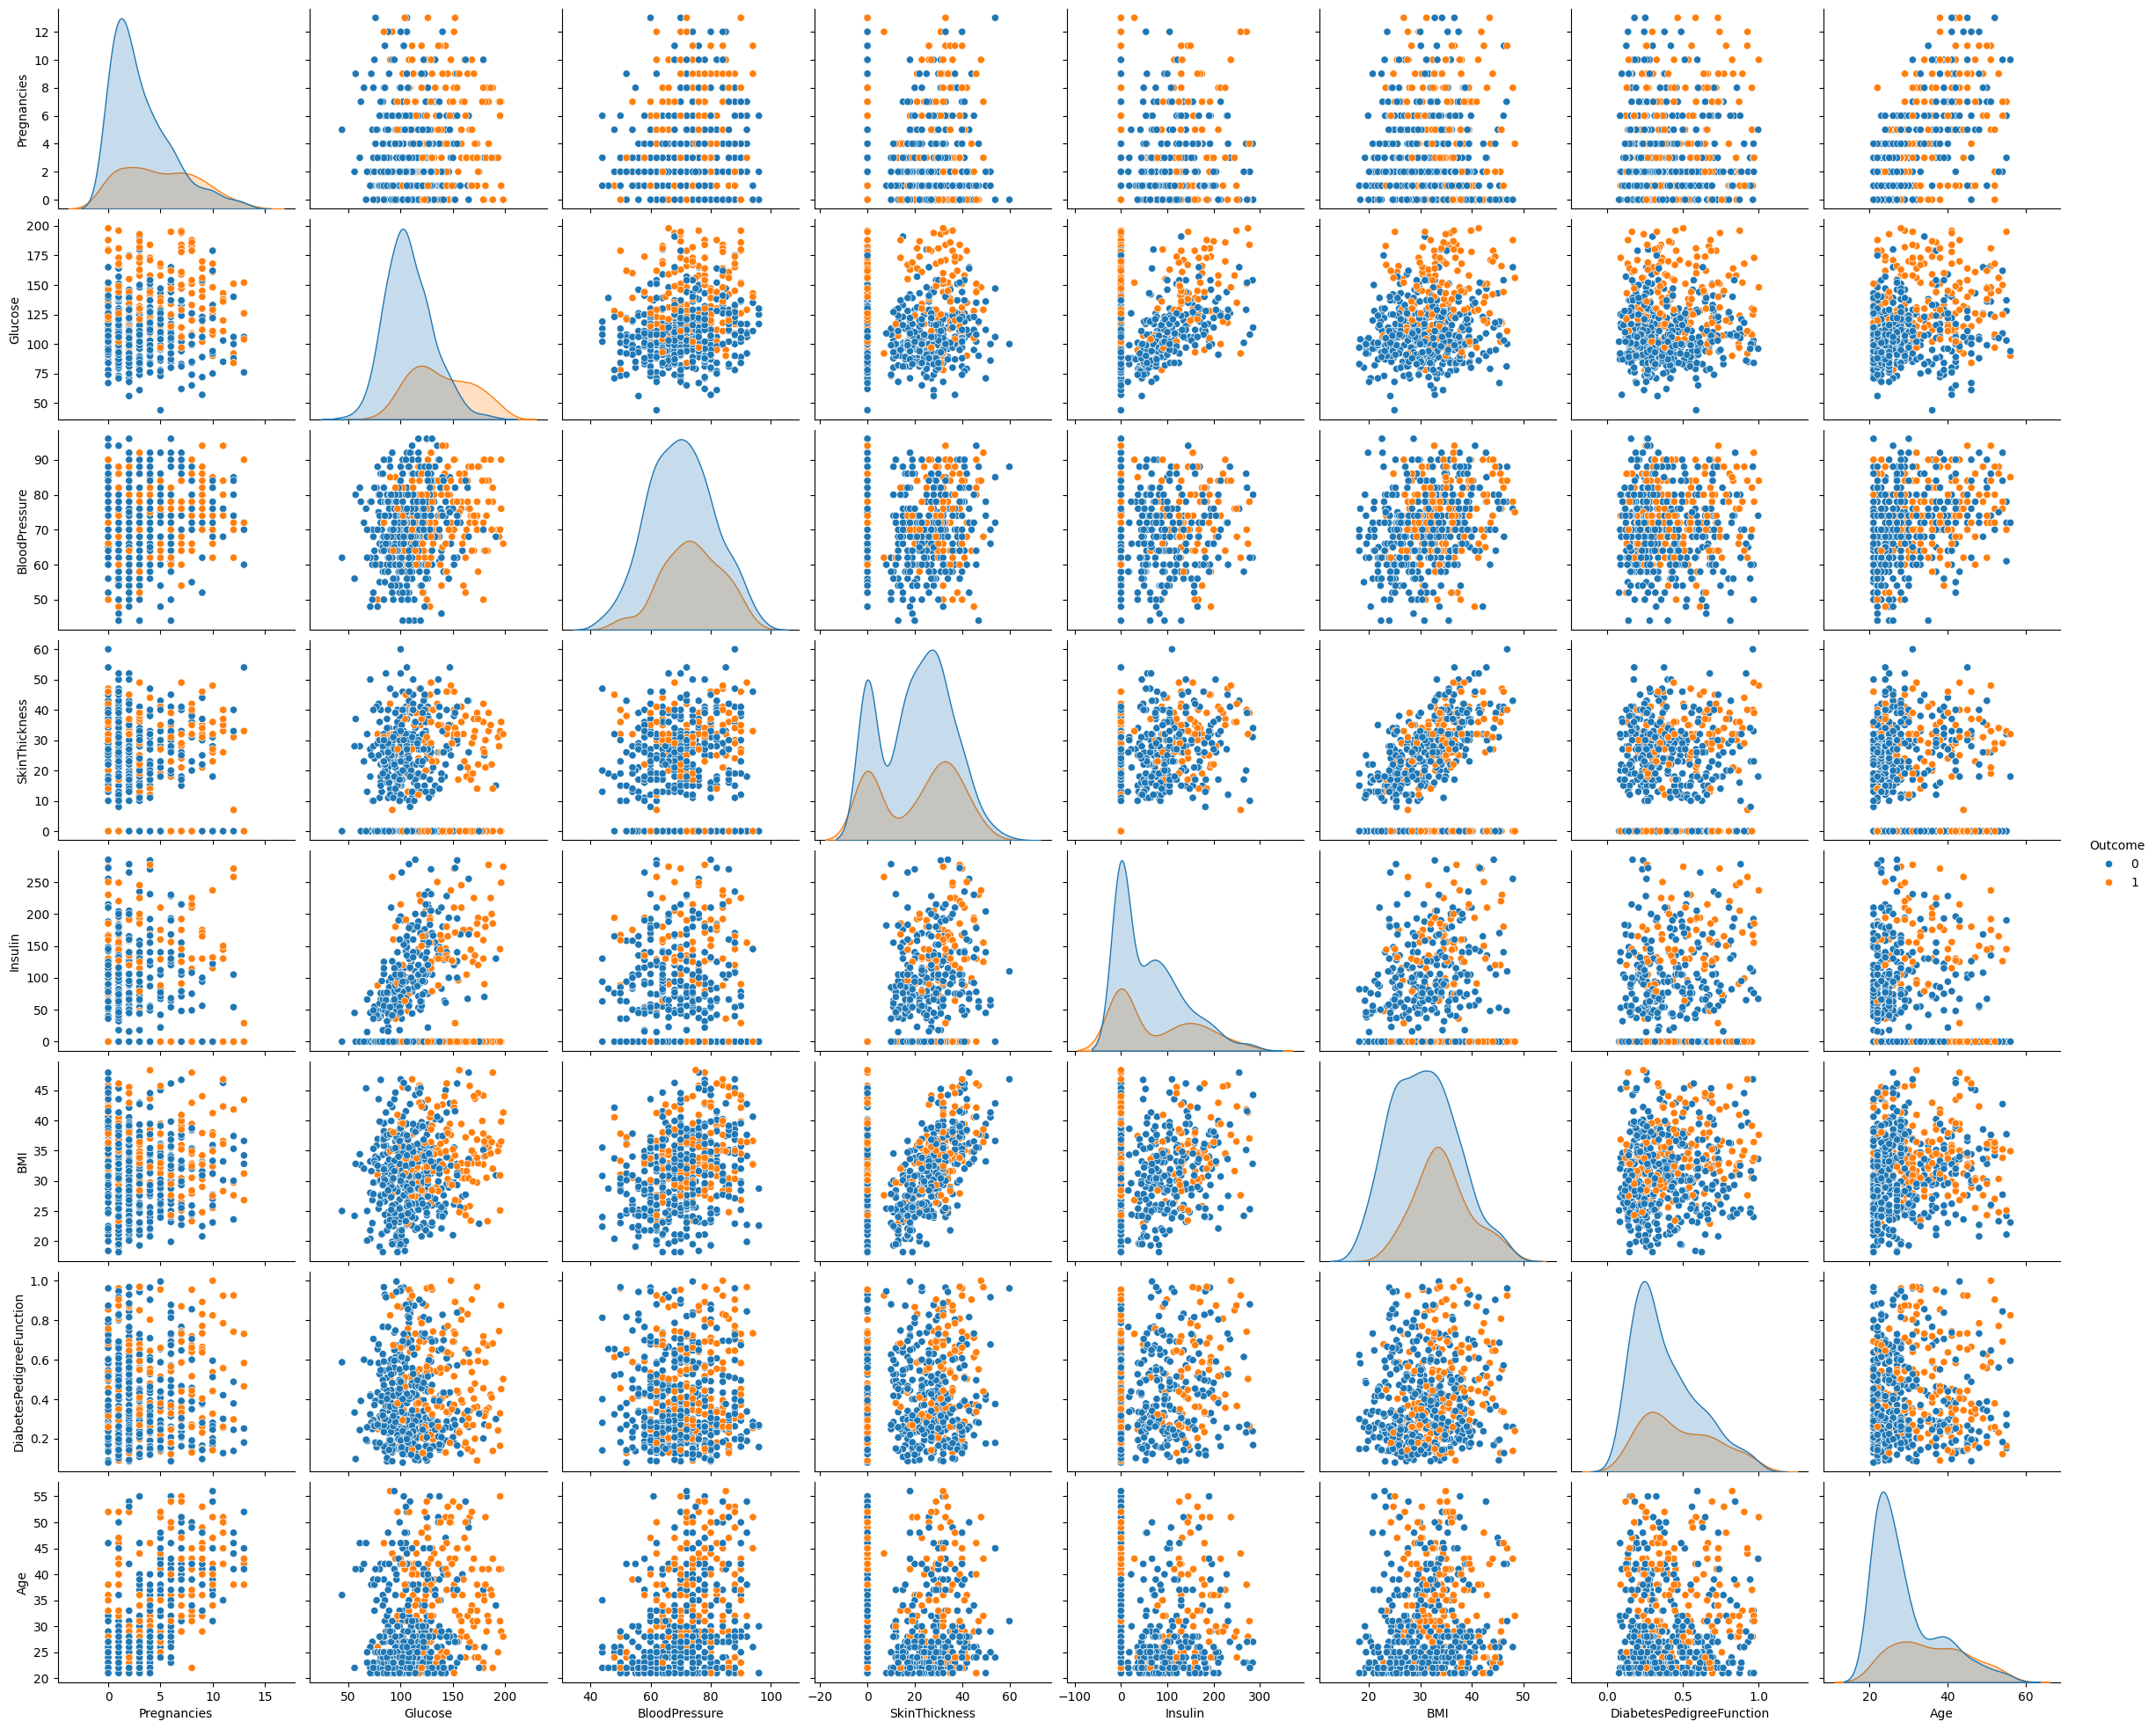

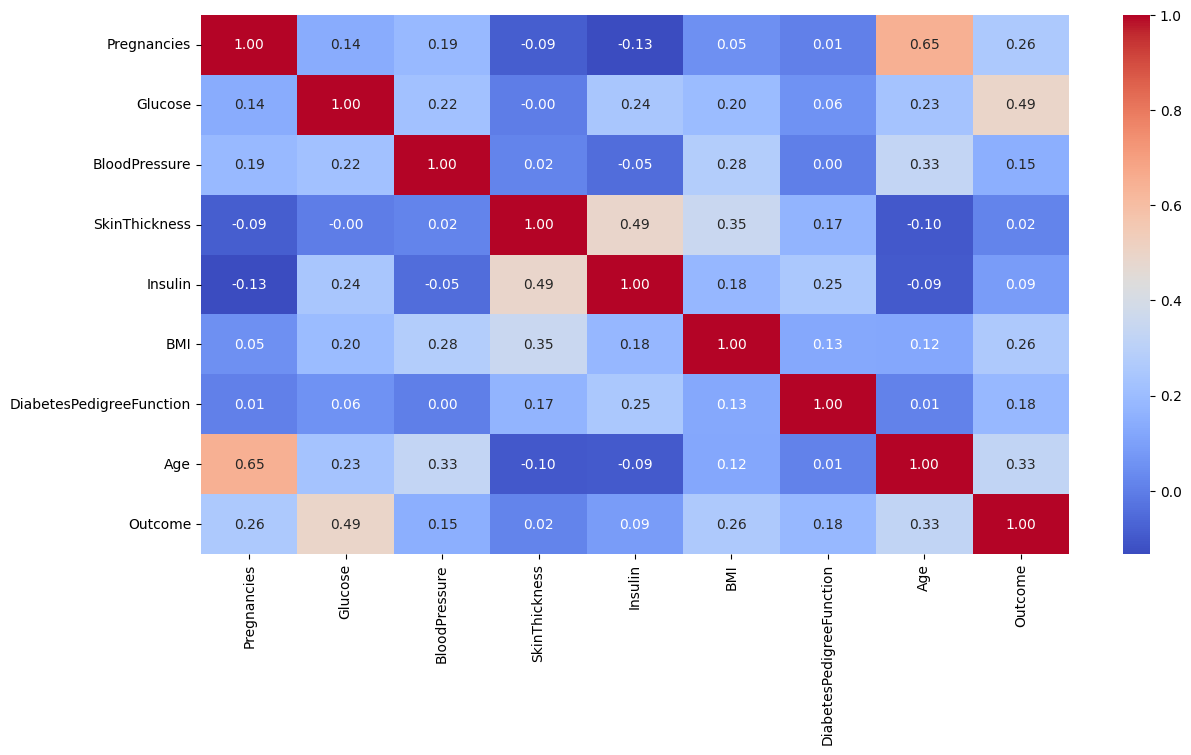

In [ ]:
# Pairplot
sns.pairplot(dataset, hue='Outcome', height=2.5, aspect=1.2)
plt.show()

# Heatmap
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#**OVERALL SUMMARY**

*The dataset shows that Glucose and BMI are the strongest indicators, with Age and Pregnancies also contributing. Proper data cleaning (handling zeros) is essential. The dataset is suitable for classification tasks, with some imbalance (~65% non-diabetic, ~35% diabetic).*